In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
%matplotlib inline
import sympy
import ipywidgets as widgets
import warnings,pprint
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def plotHist(x,bins=15,probability=False,width=None,ec='k',**kwargs):
    counts,bins = np.histogram(x,bins=bins)
    if width is None:
        width=bins[1]-bins[0]
    label="Counts"
    if probability:
        counts = counts.astype(float)/np.sum(counts)
        label = "Probability"
    plt.bar(bins[:-1],counts,width=width,edgecolor=ec,**kwargs)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel(label,fontsize=15)

# Expected Values

Imagine that I offer you a choice.

Either you can roll a six-sided die and get a dollar amount equal to the number you role (i.e., rolling a 2 yields $\$2$).

Or you can flip a coin and receive $\$6$ if you get heads and $\$0$ if you get tails.

Which option should you choose to maximize your money?

We will represent the random process of rolling the with $D$ and the random process of flipping the coin using $C$.

These variables $C$ and $D$ are stand-ins for the unknown random outcome of flipping the coin or rolling the die.

We can choose which game to play by calculating the **expected value** of each scenario.

Expected values are the on-average outcome from a random variable $X$ and you calculate them using

$
    E[X] = \displaystyle\sum_{x\in X}x\cdot p(x)
$

where $E[X]$ is the expected value, $x$ is one of the possible outcomes of the random variable $X$, and $p(x)$ is the probability of that outcome.

Here we are summing $x\cdot p(x)$ for each possible outcome $x\in X$.

In the first scenario, you can roll a six-sided die and get a dollar amount equal to the number you role (i.e., rolling a 2 yields $\$2$).

Let's assume both the die and the coin are fair.

So the possible outcomes are $\hspace{1cm}D=\{\$1,\,\$2,\,\$3,\,\$4,\,\$5,\,\$6\}$ and the expected value is 

$
E[D] = \displaystyle\sum_{x\in D} x\cdot p(x) = \$1\frac{1}{6}+\$2\frac{1}{6}+\$3\frac{1}{6}+\$4\frac{1}{6}+\$5\frac{1}{6}+\$6\frac{1}{6} = \frac{\$1 +\$2 + \$3 + \$4 + \$5 + \$6}{6} = \color{blue}{\$3.5}
$

In the second scenario, you can flip a coin and receive $\$6$ if you get heads and $\$0$ if you get tails.

So the possible outcomes are $\hspace{1cm}C=\{\$0,\,\$6\}$ and the expected value is

$
E[C] = \displaystyle\sum_{x\in C} x\cdot p(x) = \$0\frac{1}{2}+\$6\frac{1}{2}=\frac{\$0 + \$6}{2} = \color{red}{\$3}
$

So playing the dice game maximizes your expected earnings!

For both $E[D]=\frac{\$1 +\$2 + \$3 + \$4 + \$5 + \$6}{6}$ and $E[C]=\frac{\$0 + \$6}{2}$, the expected values are simply the average of the possible outcomes.

But the calculations are not so simple if different outcomes have different probabilities (e.g., if $p(\$2)\neq p(\$3)$ in the die game).

When probabilities vary, we still use the same calculation:$\hspace{1cm}E[X] = \displaystyle\sum_{x\in X} x\cdot p(x)$

We can also think of $E[X]$ as the vector product $\hspace{1cm}E[X] = \vec{x}\cdot\vec{p}\hspace{1cm}$ where $\vec{x}$ is the vector of possible outcomes and $\vec{p}$ is the vector of probabilities associated with each outcome.

In the demo, pretend that you have an unfair weighted die and see how $E[D]$ changes as we change the probabilities of die outcomes.

In [121]:
def weightedDice(
    p1=1/6,
    p2=1/6,
    p3=1/6,
    p4=1/6,
    p5=1/6,
):
    p6 = np.max([0,1-(p1+p2+p3+p4+p5)])
    weights = np.array([p1,p2,p3,p4,p5,p6])
    s = np.sum(weights)
    if np.round(s,decimals=2) != 1:
        print("Entered probabilities sum to %0.2f" % s)
        print("Probabilities must sum to 1.")
        return
    x = np.arange(6)+1
    e = np.dot(x,weights)
    plt.figure()
    plt.bar(x,weights,width=1,edgecolor='k',align="center")
    plt.xticks(x,x.astype(int),fontsize=15)
    plt.xlabel("Die Roll Outcome",fontsize=15)
    plt.ylim((0,1))
    plt.yticks(fontsize=15)
    plt.ylabel("Probability",fontsize=15)
    plt.title("E[D]= \\$1(%0.2f)+\\$2(%0.2f)+\\$3(%0.2f)\\$4(%0.2f)+\\$5(%0.2f)+\\$6(%0.2f)\n= \\$%0.2f" % (p1,
                                                                                                            p2,
                                                                                                            p3,
                                                                                                            p4,
                                                                                                            p5,
                                                                                                            p6,
                                                                                                            e),
              fontsize=12);
    
widgets.interact(
    weightedDice,
    p1 = (0,1,.05),
    p2 = (0,1,.05),
    p3 = (0,1,.05),
    p4 = (0,1,.05),
    p5 = (0,1,.05),
);

interactive(children=(FloatSlider(value=0.16666666666666666, description='p1', max=1.0, step=0.05), FloatSlide…

# Samples of Dice Rolls

Consider again the die roll game with a fair six-sided die where you win an amount of money equal to your die roll (e.g., $1\rightarrow\$1,\,2\rightarrow\$2,\dots,6\rightarrow\$6$).

Each outcome is equally likely because the die is fair.

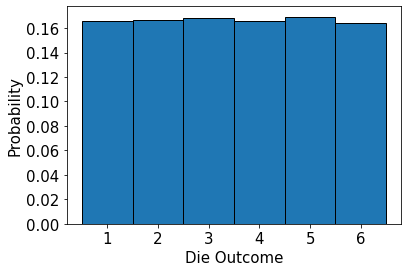

In [206]:
n = 100_000
diceRolls = np.random.choice([1,2,3,4,5,6],size=n,replace=True)
# diceRolls
plotHist(diceRolls,bins=[1,2,3,4,5,6,7],probability=True,width=1)
plt.xlabel("Die Outcome",fontsize=15);

In the case of a fair 6-sided die, we know the expected value is $\hspace{1cm}E[D]=\frac{1+\cdots+6}{6} = 3.5$

Let's look at the average outcome of a few sets of dice rolls and calculate the average outcome of the sample.

For example, we might investigate 3 samples each containing 4 dice rolls:

In [212]:
sampleSize = 4
sampleCount = 3
data = np.random.choice(
    [1,2,3,4,5,6],                 # possible outcomes  
    size=(sampleCount,sampleSize), # number of random selections to make
    replace=True,                  # select from outcomes with replacement
)
print(data)
print()
print(np.mean(data,axis=1)) # take the average of each row

[[4 3 4 1]
 [6 6 5 5]
 [3 2 2 4]]

[3.   5.5  2.75]


Let's see what happens if we take larger samples or consider more samples.

In [6]:
# hide
def sampleDiceRolls(sampleSize=1,sampleCount=10):
    data = np.random.choice([1,2,3,4,5,6],size=(sampleCount,sampleSize),replace=True)
    data = np.mean(data,axis=1)
    plt.figure(figsize=(10,4))
    plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
    plt.xlabel("Sample Average (Fair Dice Roll)",fontsize=15)
    plt.title("%d samples each containing %d dice rolls" % (sampleCount,sampleSize),fontsize=15)
    yy = plt.ylim()
    plt.plot([3.5,3.5],yy,'k--',label="$E[D]=3.5$")
    plt.ylim(yy)
    plt.legend(frameon=False,fontsize=15,loc="upper right")
    
widgets.interact(sampleDiceRolls,sampleSize=(1,50,1),sampleCount=(1,10_000,10));

interactive(children=(IntSlider(value=1, description='sampleSize', max=50, min=1), IntSlider(value=10, descrip…

This distribution is quite different from the uniform distribution! 

Instead, as the sample count increases, this distribution centers and bunches around $E[D]=3.5$ roughly in the shape of a bell.

What if the die is not fair? For example, what if the probability is proportional to the outcome?

In this case the new expected value is

In [14]:
p = np.arange(6).astype(float)+1
p /= np.sum(p)
print(np.dot(p,np.arange(6)+1))

4.333333333333333


In [8]:
# hide 
def diceRollDistributionP(n=10,showAvg=True):
    p = np.arange(6).astype(float)+1
    p /= np.sum(p)
    diceRolls = np.random.choice([1,2,3,4,5,6],size=n,replace=True,p=p)
    plotHist(diceRolls,bins=[1,2,3,4,5,6,7],probability=True,width=1,label="_data")
    plt.xlabel("Die Outcome",fontsize=15);
    if showAvg:
        e = np.dot(np.arange(6)+1,p)
        yy = plt.ylim()
        plt.plot([e,e],yy,'k--',linewidth=3,label="$E[D]=%0.2f$" % e)
        plt.ylim(yy)
        plt.legend(fontsize=15,frameon=False)
    
    
widgets.interact(diceRollDistributionP,n=(1,1000),showAvg=widgets.fixed(True));

interactive(children=(IntSlider(value=10, description='n', max=1000, min=1), Output()), _dom_classes=('widget-…

Again, let's see what happens if we take larger samples or consider more samples.

In [9]:
# hide
def sampleDiceRollsP(sampleSize=1,sampleCount=10):
    p = np.arange(6).astype(float)+1
    p /= np.sum(p)
    data = np.random.choice([1,2,3,4,5,6],size=(sampleCount,sampleSize),replace=True,p=p)
    data = np.mean(data,axis=1)
    plt.figure(figsize=(10,4))
    plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
    plt.xlabel("Sample Average (Weighted Dice Roll)",fontsize=15)
    plt.title("%d samples each containing %d dice rolls" % (sampleCount,sampleSize),fontsize=15)
    yy = plt.ylim()
    e = np.dot(p,np.arange(6)+1)
    plt.plot([e,e],yy,'k--',label="$E[D]=%0.2f$" % e)
    plt.ylim(yy)
    plt.legend(frameon=False,fontsize=15,loc="upper right")
    
widgets.interact(sampleDiceRollsP,sampleSize=(1,50,1),sampleCount=(1,10_000,10));

interactive(children=(IntSlider(value=1, description='sampleSize', max=50, min=1), IntSlider(value=10, descrip…

A similar result! The distribution of sample means has a similar shape although centered and bunched around the new expected value.

# Populations vs. Samples
## Example 1: Estimating American adult heights

Did you now that the average 19 year old is 67 inches tall (about 5.5 feet)?

How could I know that? Did I ask **every** 19 year old their height? No.

Commonly researchers ask population-level questions (e.g., "What is the average height?") but can only access a sample of the full population. 

For example, leading up to an election, political pollsters estimate election outcomes by asking a **representative** sample of the population about their voting preferences; however, they do not ask every voters' opinion because that would take too long and many voters might not respond to the survey.

In [3]:
# height statistics from
# https://www.who.int/tools/growth-reference-data-for-5to19-years/indicators/height-for-age
girls = {
    "Mean height":164,
    "Standard deviation":6,
}
boys = {
    "Mean height":176,
    "Standard deviation":8,
}
girls = pd.Series(girls)
boys = pd.Series(boys)
# cm to inches
girls *= 0.393701
boys *= 0.393701

In [4]:
# simulate "ground truth" data based on statistics
popSize = 1000
boyHeights = np.random.normal(
    loc = boys["Mean height"],
    scale = boys["Standard deviation"],
    size = popSize,
)
girlHeights = np.random.normal(
    loc = girls["Mean height"],
    scale = girls["Standard deviation"],
    size = popSize,
)
allHeights = np.hstack((boyHeights,girlHeights))

So can we estimate population-level characteristics from samples of the population?

We will explore this question using population height data from the <a href='https://www.who.int/tools/growth-reference-data-for-5to19-years/indicators/height-for-age'>World Health Organization (WHO)</a>.

In [5]:
# array of heights for 15-19 year old girls and boys
print((len(boyHeights),len(girlHeights)))
print(boyHeights[:10])
print(girlHeights[:10])

(1000, 1000)
[79.15220316 71.31274481 64.05332653 66.90424347 71.45316072 67.4349782
 73.39720543 70.48525722 66.13742676 70.82250857]
[68.4665428  65.53473764 67.07521739 68.47796783 67.63461823 64.17059955
 61.14289806 60.96605835 65.60787326 62.2475199 ]


First, let's use the expected value calculation to estimate the average height $E[H]$ of American 19 year olds. 

I will need the observed heights of boys $H_b$ and of girls $H_g$.

Then, if I know the proportion of 19 year olds that are boys $p(boy)$ or girls $p(girl)$ then I can calculate the average height of a 19 year old according to 

$
   E[H] = p(boy)\cdot E[H_b] + p(girl)\cdot E[H_g]
$

In [13]:
# population counts for 15-19 year olds from: 
# https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/
# Counts in millions
maleCount = 11.0
femaleCount = 10.58
totalCount = maleCount + femaleCount
maleP = (maleCount/totalCount)
femaleP = (femaleCount/totalCount)
avgHeight = maleP*np.mean(boyHeights) + femaleP*np.mean(girlHeights)
print("Avg Height: %0.2f inches" % avgHeight)

Avg Height: 67.08 inches


I was able to combine the distribution of 19 year old boy heights and girls heights to calculate an overall average height for 19 year olds.

So who actually has this average height?

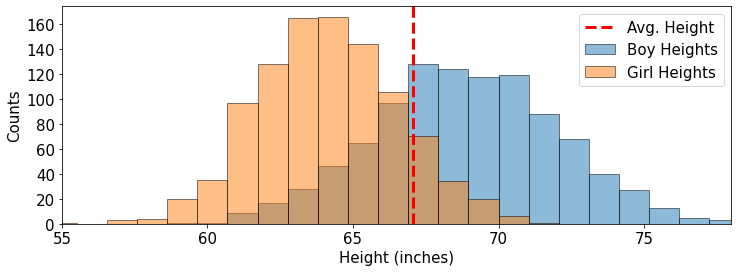

In [14]:
# hide
bins = np.linspace(55,85,30)
plt.figure(figsize=(12,4))
plotHist(boyHeights,bins=bins,label="Boy Heights",alpha=.5)
plotHist(girlHeights,bins=bins,label="Girl Heights",alpha=.5)
yy = plt.ylim()
plt.plot([avgHeight,avgHeight],yy,'r--',linewidth=3,label="Avg. Height")
plt.ylim(yy)
plt.xlim((55,78))
plt.legend(fontsize=15)
plt.xlabel("Height (inches)",fontsize=15);

From the plot, we can see that, on average, boys are actually taller than the overall average height $\hspace{1cm}E[H_b] > E[H]$

Also, on average, girls are shorter than the overall average height $\hspace{1cm}E[H_g] < E[H]$

We can calculate the average heights by gender:

In [15]:
np.mean(boyHeights),np.mean(girlHeights),avgHeight

(69.39746454496027, 64.66157982636437, 67.07560818153374)

Let's imagine we are running this survey asking people for their heights.

But, because it's a survey, imagine that we can only sample the population and measure heights.

In [16]:
# hide
def sampleHeights(sampleSize=1,sampleCount=10):
    allHeights = np.hstack((boyHeights,girlHeights))
    boyCount = len(boyHeights)
    femaleCount = len(girlHeights)
    p = np.hstack((maleP/boyCount*np.ones(boyCount),femaleP/femaleCount*np.ones(femaleCount)))
    data = np.random.choice(allHeights,size=(sampleCount,sampleSize),replace=True,p=p)
    data = np.mean(data,axis=1)
    plt.figure(figsize=(10,4))
    bins = np.linspace(np.min(allHeights),np.max(allHeights),50)
    plotHist(data,bins=bins,probability=True,facecolor='r',label="_data")
    plt.xlabel("Sample Average (inches)",fontsize=15)
    plt.title("%d samples each containing %d individuals" % (sampleCount,sampleSize),fontsize=15)
    yy = plt.ylim()
    plt.plot([avgHeight,avgHeight],yy,'k--',label="$E[H]=%0.2f$" % avgHeight)
    plt.ylim(yy)
    plt.legend(frameon=False,fontsize=15,loc="upper right")
    
widgets.interact(sampleHeights,sampleSize=(1,50,1),sampleCount=(1,10_000,10));

interactive(children=(IntSlider(value=1, description='sampleSize', max=50, min=1), IntSlider(value=10, descrip…

As in the dice roll example, here we again find that the distribution of sample averages looks nothing like the population's distribution of heights.

Instead, this distributions centers and bunches around $E[H]=67.05$

This is promising because we can estimate the true population average from samples, especially as the sample get larger.

# Populations vs. Samples
## Example 2: Estimating Annual Wages for US Workers

Did you now that the average working Americans annual wage in 2019 was about \$55,000?

How could I know that? Did I ask **every** American about their wage? No.

So can we estimate population-level characteristics from samples of the population?

To explore this question, I have pulled <a href='https://www.bls.gov/oes/'>national employment and wage data</a> from the US Bureau of Labor Statistics.

This data includes employment and average annual wage for over 700 different occupations in the US economy. 

This data is representative of the US workforce, but does have some limitations. For example, they will not report statistics for occupations with fewer than 30 workers. 

(note this is not a problem for national employment statistics, but can be a problem for similar employment statistics for smaller areas, such as states or cities)

In [17]:
# read in CSV data as a dataframe using Pandas
national = pd.read_csv("../nationalOews.csv").drop(columns=["total employment","H_MEAN","EMP_SHR"])
# remove occupation aggregations
# note: occupation codes follow the Standard Occupation Classification system
national = national[
    (national["OCC_CODE"].apply(lambda s: s[-1] != '0')) & \
    (~np.isnan(national["A_MEAN"]))
]
# filter to the year of interest
national = national[national["year"] == 2019]
# give dataframe columns more intuitive names
national = national.rename(columns={
    "OCC_CODE":"occupation code",
    "OCC_TITLE":"occupation title",
    "TOT_EMP":"national employment",
#     "H_MEAN":"avg hourly wage", 
    "A_MEAN":"avg annual wage",
})
# look at data dimensions
print(national.shape)
national.head()

(773, 5)


,year,occupation code,occupation title,national employment,avg annual wage
2705,2019,11-1011,Chief Executives,205890,193850.0
2707,2019,11-1021,General and Operations Managers,2400280,123030.0
2709,2019,11-1031,Legislators,52280,49440.0
2712,2019,11-2011,Advertising and Promotions Managers,25100,141890.0
2714,2019,11-2021,Marketing Managers,263680,149200.0


To calculate the average annual wage, $E[W]$, we need wages $W$ associated with each occupation, and the probaility that a worker has a given occupation $p(occupation)$.

We can calculate $p(occupation)$ from the employment counts in the dataframe.

For example, if their are 100 taxi drivers out of 1,000 workers, then $p(\text{taxi driver}) = 100/1000$

In [18]:
# calculate employment share 
# (ie, the fraction of the total employment associated with each occupation)
national["p(occupation)"] = national["national employment"] / national["national employment"].sum()
# test that p(occupation) sums to 1
print("sum p(occupation) = %0.2f" % national["p(occupation)"].sum())
national.head()

sum p(occupation) = 1.00


,year,occupation code,occupation title,national employment,avg annual wage,p(occupation)
2705,2019,11-1011,Chief Executives,205890,193850.0,0.001465
2707,2019,11-1021,General and Operations Managers,2400280,123030.0,0.017074
2709,2019,11-1031,Legislators,52280,49440.0,0.000372
2712,2019,11-2011,Advertising and Promotions Managers,25100,141890.0,0.000179
2714,2019,11-2021,Marketing Managers,263680,149200.0,0.001876


Now we have the parts needed to calculate the average annual wage of an American worker in 2019.

The 'avg annual wage' column represents the possible wage outcomes depending on the occupation. Mathematically, let's denote this column with $\color{blue}{\vec{w}}$.

The 'p(occupation)' column is the probability that a worker has a given occupation. Mathematically, let's denote this column with $\color{red}{\vec{p}}$.

Then, $\hspace{1cm}E[W] = \color{blue}{\vec{w}}\cdot\color{red}{\vec{p}}$

In [19]:
E = national["avg annual wage"].dot(national["p(occupation)"])
print("The average annual wage is $%0.2f" % E)

The average annual wage is $54078.05


How well does this expected annual wage represent the full distribution of wages?

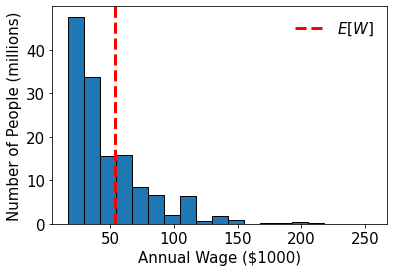

In [20]:
# identify equally spaced wage bins & place rows into bins
wages = national["avg annual wage"]
bins = np.linspace(wages.min(),wages.max(),20)
national["wage bin"] = pd.cut(wages,bins=bins,)
# Count number of people in each bin
temp = national.groupby("wage bin").agg({"national employment":"sum"})
# Plot distribution
bins /= 1000
plt.bar(
    bins[:-1],
    temp["national employment"]/10**6,
    width=bins[1]-bins[0],
    edgecolor='k',
    label="_data",
)
yy = plt.ylim()
plt.plot([E/1000,E/1000],yy,'r--',linewidth=3,label="$E[W]$")
plt.ylim(yy)
plt.legend(fontsize=15,frameon=False)
plt.xticks(fontsize=15)
plt.xlabel("Annual Wage (\$1000)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of People (millions)",fontsize=15);

Although $E[W] = \$54,078$, this wage is not the most common.

The most common **modal** annual wage is lower than $E[W]$.

And many workers earn wages much higher than $E[W]$.

Therefore, we say the distribution is **skewed** because the distribution does not bunch around distribution's average.

How many workers are captured in our dataset?

In [35]:
print("Number of Unique Occupations: %d" % len(national))
print("Number of Workers: %d" % national["national employment"].sum())

Number of Unique Occupations: 773
Number of Workers: 140584900


140,584,900 is a lot of people! Without a centralized authority, like the US Bureau of Labor Statistics, it would be very difficult to reach this many people to ask them about their job and earnings.

So, let's imagine we can't see the full distribution.

In fact, instead of surveying 140 million workers, what if we can only survey 10 workers?

Can we still estimate the average annual wage? Let $\color{green}{\bar{W}}$ denote the average wage of our sample

In [63]:
def plotWageSampleDist(sample):
    plotHist(sample,label="_data")
    yy = plt.ylim()
    yy = (0,1.5*yy[1])
    plt.plot([E/1000,E/1000],yy,'r--',linewidth=3,label="Population Avg: $E[W]=\$%0.2f$" % E)
    e = np.mean(sample)
    plt.plot([e,e],yy,'k--',linewidth=3,label="Sample Avg: $\\bar{W}=\$%0.2f$" % (1000*e))
    plt.ylim(yy)
    plt.xlim((national["avg annual wage"].min()/1000,national["avg annual wage"].max()/1000))
    plt.legend(fontsize=15,frameon=True,loc="upper right") 
    plt.title("Sample Size: %d" % len(sample),fontsize=15)
    plt.xlabel("Thousands of Dollars",fontsize=15);

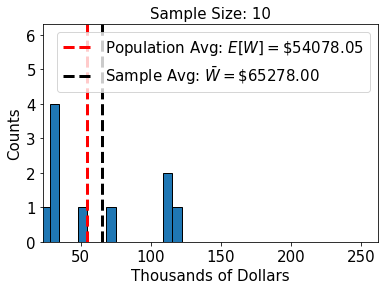

In [232]:
# We are randomly surveying workers, not occupations
# So we need to choose occupations from the data with probabilities proportional to p(occupation).
sample = np.random.choice(
    national["avg annual wage"],
    size=10,
    replace=True,
    p=national["p(occupation)"],
)
# try multiple samples. 
# Is the average wage of the sample always close to the true average wage?
plotWageSampleDist(sample/1000)

$\bar{W}$ calculated from the sample of 10 workers does not always approximate the true population average $E[W]$. 

However, again, if we take multiple small samples, calculate the average of each sample $\bar{W_i}$, and look at the distribution of samples, we find a normal distribution with an average approaching the population average.

That is, $\hspace{1cm}\langle \bar{W_i}\rangle \approx E[W]$.

In [82]:
def plotWageSampleAvgDist(A,trials=1):
    sample = A[:trials]/1000
    plotHist(sample,label="_data",color='lightgray',alpha=.6)
    yy = plt.ylim()
    yy = (0,1.5*yy[1])
    plt.plot([E/1000,E/1000],yy,'r--',linewidth=3,label="$E[W]=\$%0.2f$" % E)
    e = np.mean(sample)
    plt.plot([e,e],yy,'k--',linewidth=3,label="Avg $\\bar{W}$: $\$%0.2f$" % (1000*e))
    plt.ylim(yy)
    plt.legend(fontsize=15,frameon=True,loc="upper right") 
    plt.title("Number of Sample Averages: %d" % trials,fontsize=15)
    plt.xlabel("Thousands of Dollars",fontsize=15);

In [25]:
trials = 1000
A = np.zeros(trials)
for trial in range(trials):
    sample = np.random.choice(national["avg annual wage"],size=100,replace=True,
                              p=national["p(occupation)"])
    A[trial] = np.mean(sample)

In [83]:
# hide 
widgets.interact(plotWageSampleAvgDist,A=widgets.fixed(A),trials=(1,len(A),5));

interactive(children=(IntSlider(value=1, description='trials', max=1000, min=1, step=5), Output()), _dom_class…

Again, we find that the distribution of sample averages looks nothing like the population's distribution of wages.

Instead, this distributions centers and bunches around $E[W]=\$54,078$

This is promising because we can estimate the true population average from samples, especially as the sample get larger.

# The Central Limit Theorem and the Normal "Bell Curve" Distribution


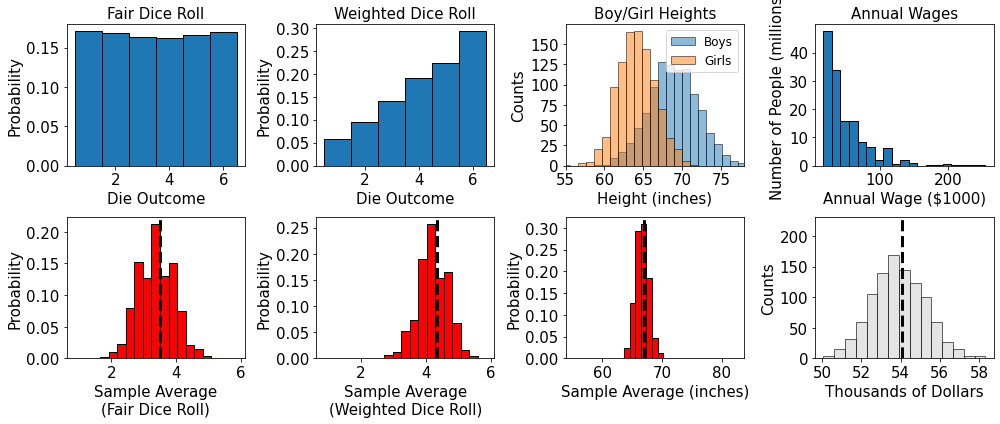

In [27]:
# hide
plt.figure(figsize=(14,6))
plt.subplot(2,4,1)
n = 10_000
diceRolls = np.random.choice([1,2,3,4,5,6],size=n,replace=True)
# diceRolls
plotHist(diceRolls,bins=[1,2,3,4,5,6,7],probability=True,width=1)
plt.xlabel("Die Outcome",fontsize=15);
plt.title("Fair Dice Roll",fontsize=15);

plt.subplot(2,4,2)
diceRollDistributionP(n=1000,showAvg=False)
plt.title("Weighted Dice Roll",fontsize=15)

plt.subplot(2,4,3)
bins = np.linspace(55,85,30)
plotHist(boyHeights,bins=bins,label="Boys",alpha=.5)
plotHist(girlHeights,bins=bins,label="Girls",alpha=.5)
# yy = plt.ylim()
# plt.plot([avgHeight,avgHeight],yy,'r--',linewidth=3,label="Avg. Height")
# plt.ylim(yy)
plt.xlim((55,78))
plt.legend(fontsize=12)
plt.xlabel("Height (inches)",fontsize=15);
plt.title("Boy/Girl Heights",fontsize=15)

plt.subplot(2,4,4)
wages = national["avg annual wage"]
bins = np.linspace(wages.min(),wages.max(),20)
national["wage bin"] = pd.cut(wages,bins=bins,)
# Count number of people in each bin
temp = national.groupby("wage bin").agg({"national employment":"sum"})
# Plot distribution
bins /= 1000
plt.bar(
    bins[:-1],
    temp["national employment"]/10**6,
    width=bins[1]-bins[0],
    edgecolor='k',
    label="_data",
)
# yy = plt.ylim()
# plt.plot([E/1000,E/1000],yy,'r--',linewidth=3,label="$E[W]$")
# plt.ylim(yy)
# plt.legend(fontsize=15,frameon=False)
plt.xticks(fontsize=15)
plt.xlabel("Annual Wage (\$1000)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of People (millions)",fontsize=15);
plt.title("Annual Wages",fontsize=15)

plt.subplot(2,4,5)
data = np.random.choice([1,2,3,4,5,6],size=(8000,10),replace=True)
data = np.mean(data,axis=1)
plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
plt.xlabel("Sample Average\n(Fair Dice Roll)",fontsize=15)
# plt.title("%d samples each containing %d dice rolls" % (sampleCount,sampleSize),fontsize=15)
yy = plt.ylim()
plt.plot([3.5,3.5],yy,'k--',label="$E[D]=3.5$",linewidth=3)
plt.ylim(yy)
# plt.legend(frameon=False,fontsize=15,loc="upper right")

plt.subplot(2,4,6)
p = np.arange(6).astype(float)+1
p /= np.sum(p)
data = np.random.choice([1,2,3,4,5,6],size=(8000,10),replace=True,p=p)
data = np.mean(data,axis=1)
plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
plt.xlabel("Sample Average\n(Weighted Dice Roll)",fontsize=15)
# plt.title("%d samples each containing %d dice rolls" % (sampleCount,sampleSize),fontsize=15)
yy = plt.ylim()
e = np.dot(p,np.arange(6)+1)
plt.plot([e,e],yy,'k--',label="$E[D]=%0.2f$" % e,linewidth=3)
plt.ylim(yy)
# plt.legend(frameon=False,fontsize=15,loc="upper right")

plt.subplot(2,4,7)
boyCount = len(boyHeights)
girlCount = len(girlHeights)
p = np.hstack((maleP/boyCount*np.ones(boyCount),femaleP/girlCount*np.ones(girlCount)))
data = np.random.choice(allHeights,size=(1000,10),replace=True,p=p)
data = np.mean(data,axis=1)
bins = np.linspace(np.min(allHeights),np.max(allHeights),30)
plotHist(data,bins=bins,probability=True,facecolor='r',label="_data")
plt.xlabel("Sample Average (inches)",fontsize=15)
# plt.title("%d samples each containing %d individuals" % (sampleCount,sampleSize),fontsize=15)
yy = plt.ylim()
plt.plot([avgHeight,avgHeight],yy,'k--',label="$E[H]=%0.2f$" % avgHeight,linewidth=3)
plt.ylim(yy)
# plt.legend(frameon=False,fontsize=15,loc="upper right")

plt.subplot(2,4,8)
trials = 1_000
A2 = np.zeros(trials)
for trial in range(trials):
    sample = np.random.choice(national["avg annual wage"],size=500,replace=True,
                              p=national["p(occupation)"])
    A2[trial] = np.mean(sample)
sample = A2/1000
plotHist(sample,label="_data",color='lightgray',alpha=.6)
yy = plt.ylim()
yy = (0,1.3*yy[1])
plt.plot([E/1000,E/1000],yy,'k--',linewidth=3,label="Population Avg: $E[W]=\$%0.2f$" % E,)
# e = np.mean(sample)
# plt.plot([e,e],yy,'k--',linewidth=3,label="Avg $\\bar{W}$: $\$%0.2f$" % (1000*e))
plt.ylim(yy)
# plt.legend(fontsize=15,frameon=True,loc="upper right") 
# plt.title("Number of Sample Averages: %d" % trials,fontsize=15)
plt.xlabel("Thousands of Dollars",fontsize=15);

plt.tight_layout()

Dice rolls (fair and weighted), population heights, and population wage data produce very different population distributions.

But, despite that diversity, distributions of sample averages produce a nearly identical bell shaped distribution.

The bells may be shifted around the true population's expected value and exhibit different widths, but still a bell-shaped curve.

The ***Centeral Limit Theorem (CLT)*** describes this observation.

If you have **any** population-level distribution and take many independent samples from that distribution (e.g., survey a portion of a population), the distribution of the averages of those samples converges to same bell-shaped distribution.

This resulting sample average distribution is so pervasive that it goes by many names:
- the Normal Distribution
- the Bell Curve
- Gaussian Distribution

To say CLT with mathematical formalizism:

Let $D$ denote the population distribution.

Let $X=\{d_1,d_2,\dots,d_n\}$ represent a random sample of outcomes from $D$ each selected with probability $p(D=d)$ and 

$\hspace{1cm}E[X] = \frac{1}{n}\displaystyle\sum_{d\in X}d\hspace{1cm}$ denote the sample's expected value.

If we have several samples $X_1,\,X_2,\dots,\,X_c$, then the distribution of $E[ X_1],\,E[ X_2],\dots,\,E[ X_c]$ converges to the Normal Distribution centered around $E[D]$.

Looking at the distributions of sample averages, not only are the centered around different points, but the widths of the distribution vary as well.

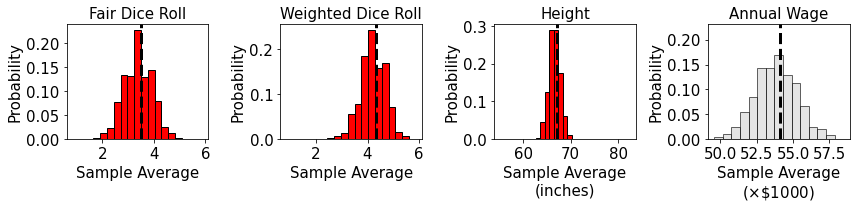

In [28]:
#hide
def plotSampleDistsAll():
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,1)
    data = np.random.choice([1,2,3,4,5,6],size=(8000,10),replace=True)
    data = np.mean(data,axis=1)
    plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
    plt.xlabel("Sample Average",fontsize=15)
    plt.title("Fair Dice Roll",fontsize=15)
    yy = plt.ylim()
    plt.plot([3.5,3.5],yy,'k--',label="$E[D]=3.5$",linewidth=3)
    plt.ylim(yy)
    # plt.legend(frameon=False,fontsize=15,loc="upper right")

    plt.subplot(1,4,2)
    p = np.arange(6).astype(float)+1
    p /= np.sum(p)
    data = np.random.choice([1,2,3,4,5,6],size=(8000,10),replace=True,p=p)
    data = np.mean(data,axis=1)
    plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
    plt.xlabel("Sample Average",fontsize=15)
    plt.title("Weighted Dice Roll",fontsize=15)
    yy = plt.ylim()
    e = np.dot(p,np.arange(6)+1)
    plt.plot([e,e],yy,'k--',label="$E[D]=%0.2f$" % e,linewidth=3)
    plt.ylim(yy)
    # plt.legend(frameon=False,fontsize=15,loc="upper right")

    plt.subplot(1,4,3)
    boyCount = len(boyHeights)
    girlCount = len(girlHeights)
    p = np.hstack((maleP/boyCount*np.ones(boyCount),femaleP/girlCount*np.ones(girlCount)))
    data = np.random.choice(allHeights,size=(1000,10),replace=True,p=p)
    data = np.mean(data,axis=1)
    bins = np.linspace(np.min(allHeights),np.max(allHeights),30)
    plotHist(data,bins=bins,probability=True,facecolor='r',label="_data")
    plt.xlabel("Sample Average\n(inches)",fontsize=15)
    plt.title("Height",fontsize=15)
    yy = plt.ylim()
    plt.plot([avgHeight,avgHeight],yy,'k--',label="$E[H]=%0.2f$" % avgHeight,linewidth=3)
    plt.ylim(yy)
    # plt.legend(frameon=False,fontsize=15,loc="upper right")

    plt.subplot(1,4,4)
    trials = 1_000
    A2 = np.zeros(trials)
    for trial in range(trials):
        sample = np.random.choice(national["avg annual wage"],size=500,replace=True,
                                  p=national["p(occupation)"])
        A2[trial] = np.mean(sample)
    sample = A2/1000
    plotHist(sample,probability=True,label="_data",color='lightgray',alpha=.6)
    yy = plt.ylim()
    yy = (0,1.3*yy[1])
    plt.plot([E/1000,E/1000],yy,'k--',linewidth=3,label="Population Avg: $E[W]=\$%0.2f$" % E,)
#     e = np.mean(sample)
#     plt.plot([e,e],yy,'k--',linewidth=3,label="Avg $\\bar{W}$: $\$%0.2f$" % (1000*e))
    plt.ylim(yy)
    # plt.legend(fontsize=15,frameon=True,loc="upper right") 
    plt.title("Annual Wage",fontsize=15)
    plt.xlabel("Sample Average\n($\\times\$1000$)",fontsize=15);

    plt.tight_layout()
    
plotSampleDistsAll()

Formally, we measure how "wide" a probability distribution using it's **variance**.

If $D$ is some probability distribution, it's variance is

$
\hspace{1cm}
Var(D) = E\left[\left(D-E[D]\right)^2\right] = \displaystyle\sum_{d\in D} \left(d-E[D]\right)^2\cdot p(D=d)
$

You can think about this as the "expected distance between outcomes in the distribution and the distribution's expected value."

If $Var(D)$ is small, then the distribution is very bunched around $E[D]$.

IF $Var(D)$ is large, then the distribution is spread out around it's center $E[D]$.

For convenience, $\sigma_D^2=Var(D)$ is a common shorthand notation for variance.

$\sigma_D = \sqrt{Var(D)}=\sqrt{\sigma_D^2}$ is called $D$'s **standard deviation**.

Standard deviation is related to $Var(D)$ since they both measure the width of the distribution.

However, they differ in their units. For example, if $D$ is heights in inches, then
- the variance $Var(D)=\sigma_D^2$ is measured in the units of $D$ squared (i.e., inches$^2$)
- the standard deviation $\sigma_D$ is measured in the same units as $D$ (i.e., inches)

With these pieces, we can define the Normal Distribution centered at $E[D]$ for some distribution $D$ as 

$
\hspace{1cm}
\mathcal{N}(x,D) = \frac{1}{\sigma_D\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-E[D]}{\sigma_D}\right)^2}
$

where $e=2.71828\dots$ is Euler's number. It's an irrational, infinte, non-repeating number similar to $\pi$.

We will skip the mathematical derivation of $\mathcal{N}(x,D)$. But this equation represents the distribution that has an average value at $E[D]$, a standard deviation of $\sigma_D$, and is maximally random.

In [251]:
# simulate dice rolls for a fair die
sampleSize = 10      # number of dice rolls per sample
# number of samples
sampleCount = 100 
data = np.random.choice([1,2,3,4,5,6],size=(sampleCount,sampleSize),replace=True)
# calculate the average die roll of each sample
sampleMeans = np.mean(data,axis=1)
# calculate variance of the distribution of sample means
V = np.var(sampleMeans)
# calculate standard deviation of the distribution of sample means
SD = np.std(sampleMeans)
print("Variance: %0.2f" % V)
print("Standard Deviation: %0.2f" % SD)
np.round(np.sqrt(V),decimals=2)

Variance: 0.29
Standard Deviation: 0.54


0.54

In [252]:
# Define function to produce normal distribution given a distribution D
# The distribution is then evaluated at each value in x
def normal(x,D):
    sd = np.std(D)
    Ed = np.mean(D)
    return np.exp(-.5*((x-Ed)/sd)**2) / (sd*np.sqrt(2*np.pi))

D = sampleMeans
x = np.linspace(np.min(D),np.max(D),100)
y = normal(x,D)

Does the normal distribution look like the real data?

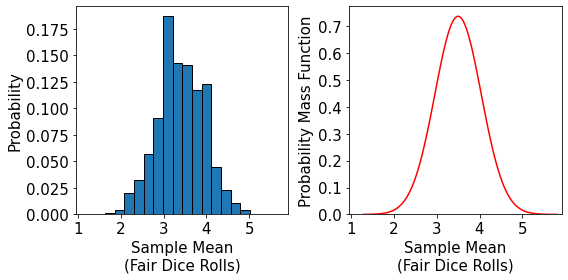

In [87]:
# hide
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plotHist(sampleMeans,bins=20,probability=True)
plt.xlabel("Sample Mean\n(Fair Dice Rolls)",fontsize=15)
xx = plt.xlim()

plt.subplot(1,2,2)
plt.plot(x,y,'r-')
plt.xlim(xx)
plt.ylim((0,plt.ylim()[1]))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Sample Mean\n(Fair Dice Rolls)",fontsize=15)
plt.ylabel("Probability Mass Function",fontsize=15);
plt.tight_layout()

Yes! They have the same mean and variance/standard deviation!

However, there are two big differences.
- First, the average dice roll distribution is **discrete** meaning only whole numbers are obtained. But the normal distribution is continuous meaning it's defined even for fractional dice rolls (e.g., $d=2.4$) which cannot happen in the real-world.
- Second, the scale of the y-axes in the two plots are different. The y-axis for the discrete distribution is called **probability density** while the y-axes for the continuous normal distribution is a **probability mass function**.



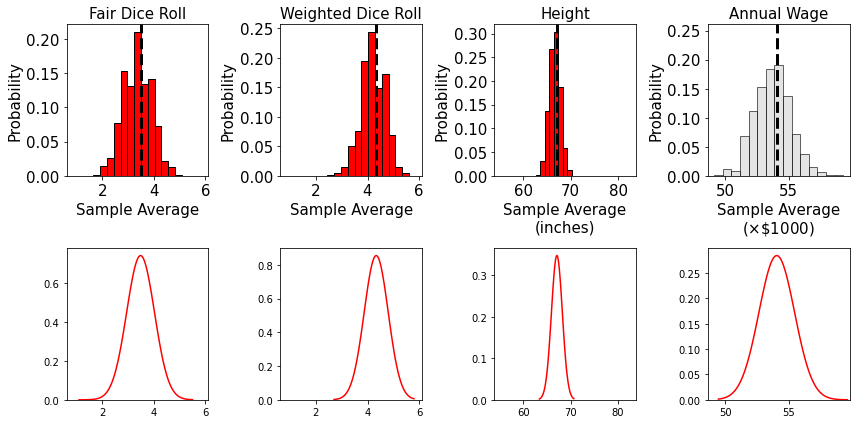

In [32]:
# hide
def normal2(D):
    x = np.linspace(np.min(D),np.max(D),100)
    return x,normal(x,D)

plt.figure(figsize=(12,6))
plt.subplot(2,4,1)
data = np.random.choice([1,2,3,4,5,6],size=(8000,10),replace=True)
data = np.mean(data,axis=1)
plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
plt.xlabel("Sample Average",fontsize=15)
plt.title("Fair Dice Roll",fontsize=15)
yy = plt.ylim()
plt.plot([3.5,3.5],yy,'k--',label="$E[D]=3.5$",linewidth=3)
plt.ylim(yy)
# plt.legend(frameon=False,fontsize=15,loc="upper right")
xx = plt.xlim()

plt.subplot(2,4,5)
x,y = normal2(data)
plt.plot(x,y,'r-')
plt.xlim(xx)
plt.ylim((0,plt.ylim()[1]))

plt.subplot(2,4,2)
p = np.arange(6).astype(float)+1
p /= np.sum(p)
data = np.random.choice([1,2,3,4,5,6],size=(8000,10),replace=True,p=p)
data = np.mean(data,axis=1)
plotHist(data,bins=np.linspace(1,6,20),probability=True,facecolor='r',label="_data")
plt.xlabel("Sample Average",fontsize=15)
plt.title("Weighted Dice Roll",fontsize=15)
yy = plt.ylim()
e = np.dot(p,np.arange(6)+1)
plt.plot([e,e],yy,'k--',label="$E[D]=%0.2f$" % e,linewidth=3)
plt.ylim(yy)
xx = plt.xlim()
# plt.legend(frameon=False,fontsize=15,loc="upper right")

plt.subplot(2,4,6)
x,y = normal2(data)
plt.plot(x,y,'r-')
plt.xlim(xx)
plt.ylim((0,plt.ylim()[1]))

plt.subplot(2,4,3)
boyCount = len(boyHeights)
girlCount = len(girlHeights)
p = np.hstack((maleP/boyCount*np.ones(boyCount),femaleP/girlCount*np.ones(girlCount)))
data = np.random.choice(allHeights,size=(1000,10),replace=True,p=p)
data = np.mean(data,axis=1)
bins = np.linspace(np.min(allHeights),np.max(allHeights),30)
plotHist(data,bins=bins,probability=True,facecolor='r',label="_data")
plt.xlabel("Sample Average\n(inches)",fontsize=15)
plt.title("Height",fontsize=15)
yy = plt.ylim()
plt.plot([avgHeight,avgHeight],yy,'k--',label="$E[H]=%0.2f$" % avgHeight,linewidth=3)
plt.ylim(yy)
xx = plt.xlim()
# plt.legend(frameon=False,fontsize=15,loc="upper right")

plt.subplot(2,4,7)
x,y = normal2(data)
plt.plot(x,y,'r-')
plt.xlim(xx)
plt.ylim((0,plt.ylim()[1]))

plt.subplot(2,4,4)
trials = 1_000
A2 = np.zeros(trials)
for trial in range(trials):
    sample = np.random.choice(national["avg annual wage"],size=500,replace=True,
                              p=national["p(occupation)"])
    A2[trial] = np.mean(sample)
sample = A2/1000
plotHist(sample,probability=True,label="_data",color='lightgray',alpha=.6)
yy = plt.ylim()
yy = (0,1.3*yy[1])
plt.plot([E/1000,E/1000],yy,'k--',linewidth=3,label="Population Avg: $E[W]=\$%0.2f$" % E,)
#     e = np.mean(sample)
#     plt.plot([e,e],yy,'k--',linewidth=3,label="Avg $\\bar{W}$: $\$%0.2f$" % (1000*e))
plt.ylim(yy)
# plt.legend(fontsize=15,frameon=True,loc="upper right") 
plt.title("Annual Wage",fontsize=15)
xx = plt.xlim()
plt.xlabel("Sample Average\n($\\times\$1000$)",fontsize=15);

plt.subplot(2,4,8)
x,y = normal2(sample)
plt.plot(x,y,'r-')
plt.xlim(xx)
plt.ylim((0,plt.ylim()[1]))

plt.tight_layout()

In each of these examples, the normal distribution built from $E[D]$ and $\sigma_D$ looks like the actual data except that the data is discrete while the normal distribution is continuous. 

In each case, the normal distribution gives a **model** that we can use to generate synthetic data that mimics the real data.

In [253]:
# Define function to produce normal distribution given a distribution D
# The distribution is then evaluated at each value in x
def normal(x,D):
    sd = np.std(D)
    Ed = np.mean(D)
    return np.exp(-.5*((x-Ed)/sd)**2) / (sd*np.sqrt(2*np.pi))

D = sampleMeans
x = np.linspace(np.min(D),np.max(D),100)
y = normal(x,D)

In [254]:
# using the dice roll data
fakeData = np.random.normal(
    loc=np.mean(sampleMeans),
    scale=np.std(sampleMeans),
    size = 500
)

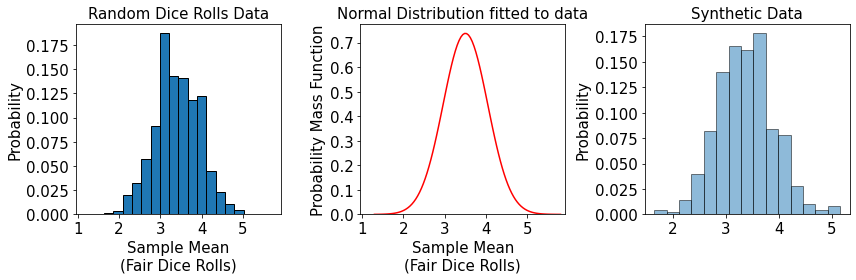

In [102]:
# hide
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plotHist(sampleMeans,bins=20,probability=True)
plt.xlabel("Sample Mean\n(Fair Dice Rolls)",fontsize=15)
xx = plt.xlim()
plt.title("Random Dice Rolls Data",fontsize=15)

plt.subplot(1,3,2)
x,y = normal2(sampleMeans)
plt.plot(x,y,'r-')
plt.xlim(xx)
plt.ylim((0,plt.ylim()[1]))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Sample Mean\n(Fair Dice Rolls)",fontsize=15)
plt.ylabel("Probability Mass Function",fontsize=15);
plt.title("Normal Distribution fitted to data",fontsize=15)

plt.subplot(1,3,3)
plotHist(fakeData,probability=True,alpha=.5)
plt.title("Synthetic Data",fontsize=15)

plt.tight_layout()

Here, "sampleMeans" is our ground truth distribution which we are modeling using a Normal Distribution to create synthetic "fake" data.

Visually, the real dice roll distribution and the synthetic distribution are similar.

But how well can I estimate the true $E[D]$ using the expected value of the synthetic data $E[D_s]$?

In [255]:
# compare synthetic data's mean to ground truth expected value of E[D]=3.5 for fair dice rolls
np.mean(fakeData) 

3.4666472954463097

Pretty close!

Now imagine we did not know the true population-level distribution. 

For example, imagine we are running a public-opinion survey and do not know the true distribution of beliefs across the whole population (if we knew the true distribution, then there would be no need for the survey).

In this case, can we assess how good our sample's expected value $E[D_s]$ approximates the population's expected value $E[D]$?

Let's represent our sample of synthetic dice rolls using $s=\{d_1,\,d_2,\,\dots,\,d_n\}$ and $\hspace{1cm}\color{red}{T_s=\displaystyle\sum_{i=1}^n d_i}\hspace{1cm}$ denote the sum of values in our sample.

Then, the expected value of the sample is
$
\hspace{1cm}
E[s] = \color{red}{T_s}/n
$

$\color{red}{T_s}$ is itself a random variable; calculating $\color{blue}{T}$ for two different samples $s_1$ and $s_2$ might yield two different values (i.e., it may be that $T_{s_1}\neq T_{s_2}$).

The $\color{blue}{T}$ values across multiple samples will form a distribution which has variance $\hspace{1cm}Var(\color{blue}{T})=n\sigma_s^2\hspace{1cm}$ because each observation $d_i$ is part of a sample with variance $\sigma_s^2$.

Similarly, across $m$ different samples, $E[s]$ will also form a distribution with variance

$
Var(E[s]) = Var(\color{blue}{T}/n) = E\left[\left(\color{blue}{T}/n-E[\color{blue}{T}/n]\right)^2\right]
= E\left[\left(\color{blue}{T}/n-\frac{1}{m}\displaystyle\sum_{i=1}^{m}\color{blue}{T}/n  \right)^2\right]
= E\left[\left(\color{blue}{T}/n-\frac{1}{n}\left(\frac{1}{m}\displaystyle\sum_{i=1}^{m}\color{blue}{T}\right)  \right)^2\right]
$

$
= \frac{1}{n^2}E\left[\left(\color{blue}{T}-E[\color{blue}{T}]\right)^2\right]
= \frac{1}{n^2}Var(\color{blue}{T})
= \frac{1}{n^2}\cdot n\sigma_s^2
= \sigma_s^2/n 
$

$Var(E[s]) = \sigma_s^2/n\hspace{1cm}$ and, therefore, the standard deviation of our distribution of $E[s]$ estimates, called the **standard error**, is $\hspace{1cm}\sigma_{E[s]} = \sqrt{\sigma_s^2/n} = \sigma_s/\sqrt{n}$

In other words, the distribution of expected values across multiple samples is again a normal distribution with expected value $\hspace{1cm}E\left[E[s]\right]=E[D]\hspace{1cm}$ and standard deviation $\hspace{1cm}\sigma_{E[s]}=\sigma_s/\sqrt{n}$

We will derive this later, but the standard error of our sample allows us to bound our estimate of the true population averge. 

For example, with 95% probability, $E[D]$ will be between $\hspace{1cm}E[s]-1.96\cdot (\sigma_s/\sqrt{n})\hspace{1cm}$ and $\hspace{1cm}E[s]+1.96\cdot (\sigma_s/\sqrt{n})$ 

<img src='./Standard_deviation_diagram.svg.png' style="width:60%"/>

In [256]:
# define function to calculate standard error of a sample distribution
stdErr = lambda sample: np.std(sample)/np.sqrt(len(sample))
# apply the function to the synthetic data
se = stdErr(fakeData)
print("Standard error: %0.4f" % se)
Es = np.mean(fakeData)
lowerBound = Es - 1.96*se
upperBound = Es + 1.96*se
print(
    "Based on our sample, there is a 95% chance that the true population "+\
    "average falls between %0.4f and %0.4f" % (lowerBound,upperBound)
)

Standard error: 0.0238
Based on our sample, there is a 95% chance that the true population average falls between 3.4201 and 3.5132
